In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('./train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
df.Sex[df.Sex=='male'] = 1
df.Sex[df.Sex=='female'] = 2
df.Embarked[df.Embarked=='C'] = 1
df.Embarked[df.Embarked=='S'] = 2
df.Embarked[df.Embarked=='Q'] = 3
df = df.fillna(0)
cabin_dic = {}
cabin_list = df.Cabin.unique()
for i in range(0,len(cabin_list)):
    cabin_dic[cabin_list[i]] = i+1
df.Cabin = [cabin_dic[item] for item in df.Cabin]
df.head(10)

<ipython-input-42-9cd863f11c23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex=='male'] = 1
<ipython-input-42-9cd863f11c23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex=='female'] = 2
<ipython-input-42-9cd863f11c23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Embarked=='C'] = 1
<ipython-input-42-9cd863f11c23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1,1
5,6,0,3,"Moran, Mr. James",0,0.0,0,0,330877,8.4583,1,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,4,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1,0


In [43]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
y = df['Survived']
print(X.head(10))
print(y.head(10))

   Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0       3    0  22.0      1      0   7.2500      1         1
1       1    1  38.0      1      0  71.2833      2         0
2       3    1  26.0      0      0   7.9250      1         1
3       1    1  35.0      1      0  53.1000      3         1
4       3    0  35.0      0      0   8.0500      1         1
5       3    0   0.0      0      0   8.4583      1         2
6       1    0  54.0      0      0  51.8625      4         1
7       3    0   2.0      3      1  21.0750      1         1
8       3    1  27.0      0      2  11.1333      1         1
9       2    1  14.0      1      0  30.0708      1         0
0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


In [44]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:10]

array([[ 0.83, -0.74, -0.1 ,  0.43, -0.47, -0.5 , -0.44,  0.2 ],
       [-1.57,  1.36,  0.81,  0.43, -0.47,  0.79, -0.42, -1.74],
       [ 0.83,  1.36,  0.13, -0.47, -0.47, -0.49, -0.44,  0.2 ],
       [-1.57,  1.36,  0.64,  0.43, -0.47,  0.42, -0.39,  0.2 ],
       [ 0.83, -0.74,  0.64, -0.47, -0.47, -0.49, -0.44,  0.2 ],
       [ 0.83, -0.74, -1.35, -0.47, -0.47, -0.48, -0.44,  2.14],
       [-1.57, -0.74,  1.72, -0.47, -0.47,  0.4 , -0.36,  0.2 ],
       [ 0.83, -0.74, -1.24,  2.25,  0.77, -0.22, -0.44,  0.2 ],
       [ 0.83,  1.36,  0.18, -0.47,  2.01, -0.42, -0.44,  0.2 ],
       [-0.37,  1.36, -0.56,  0.43, -0.47, -0.04, -0.44, -1.74]])

In [45]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=4)
print('Training Set: ',train_x.shape,train_y.shape)
print('Testing Set: ',test_x.shape,test_y.shape)

Training Set:  (712, 8) (712,)
Testing Set:  (179, 8) (179,)


In [46]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(train_x,train_y)
print(LR.coef_,LR.intercept_)

[[-0.27  0.67 -0.08 -0.1   0.02  0.14  0.19 -0.07]] [-0.3]


In [47]:
y_predict = LR.predict(test_x)
y_predict

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [48]:
from sklearn.metrics import jaccard_score
jaccard_score(test_y, y_predict,pos_label=0)

0.7608695652173914

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(test_y, y_predict, labels=[1,0]))

[[ 41  19]
 [ 14 105]]


Confusion matrix, without normalization
[[ 41  19]
 [ 14 105]]


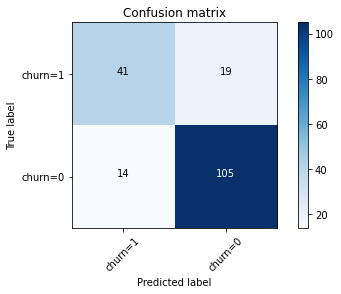

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [51]:
print (classification_report(test_y, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       119
           1       0.75      0.68      0.71        60

    accuracy                           0.82       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179



In [55]:
#Predicting on Unsupervised Data/Unknown Data

df_u = pd.read_csv('./test.csv')
df_u = df_u.fillna(0)
df_u.Sex[df_u.Sex=='male'] = 1
df_u.Sex[df_u.Sex=='female'] = 2
df_u.Embarked[df_u.Embarked=='C'] = 1
df_u.Embarked[df_u.Embarked=='S'] = 2
df_u.Embarked[df_u.Embarked=='Q'] = 3
df_u.Cabin = [cabin_dic[item] if cabin_dic.get(item) else 0 for item in df_u.Cabin]
df_u.head(10)

<ipython-input-55-0b5519fb00e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u.Sex[df_u.Sex=='male'] = 1
<ipython-input-55-0b5519fb00e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u.Sex[df_u.Sex=='female'] = 2
<ipython-input-55-0b5519fb00e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u.Embarked[df_u.Embarked=='C'] = 1
<ipython-input-55-0b5519fb00e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a c

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,1,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1,3
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,1,2
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,1,2
6,898,3,"Connolly, Miss. Kate",2,30.0,0,0,330972,7.6292,1,3
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,1,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",2,18.0,0,0,2657,7.2292,1,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,1,2


In [58]:
test_x_u = df_u[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]

In [60]:
from sklearn import preprocessing
X_u = preprocessing.StandardScaler().fit(test_x_u).transform(test_x_u)
X_u[:10]

array([[ 0.87, -0.76,  0.59, -0.5 , -0.4 , -0.5 ,  0.53,  1.96],
       [ 0.87,  1.32,  1.31,  0.62, -0.4 , -0.51,  0.53,  0.23],
       [-0.32, -0.76,  2.16, -0.5 , -0.4 , -0.46,  0.53,  1.96],
       [ 0.87, -0.76,  0.17, -0.5 , -0.4 , -0.48,  0.53,  0.23],
       [ 0.87,  1.32, -0.12,  0.62,  0.62, -0.42,  0.53,  0.23],
       [ 0.87, -0.76, -0.57, -0.5 , -0.4 , -0.47,  0.53,  0.23],
       [ 0.87,  1.32,  0.34, -0.5 , -0.4 , -0.5 ,  0.53,  1.96],
       [-0.32, -0.76,  0.11,  0.62,  0.62, -0.12,  0.53,  0.23],
       [ 0.87,  1.32, -0.34, -0.5 , -0.4 , -0.51,  0.53, -1.49],
       [ 0.87, -0.76, -0.17,  1.73, -0.4 , -0.2 ,  0.53,  0.23]])

In [64]:
y_predict_u = LR.predict(X_u)
y_predict_u

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [85]:
passengers = np.asanyarray(df_u.PassengerId)
submission = np.concatenate([[passengers, y_predict_u]],axis=1)
submission = submission.T
submission

array([[ 892,    0],
       [ 893,    1],
       [ 894,    0],
       [ 895,    0],
       [ 896,    1],
       [ 897,    0],
       [ 898,    1],
       [ 899,    0],
       [ 900,    1],
       [ 901,    0],
       [ 902,    0],
       [ 903,    0],
       [ 904,    1],
       [ 905,    0],
       [ 906,    1],
       [ 907,    1],
       [ 908,    0],
       [ 909,    0],
       [ 910,    1],
       [ 911,    1],
       [ 912,    0],
       [ 913,    0],
       [ 914,    1],
       [ 915,    0],
       [ 916,    1],
       [ 917,    0],
       [ 918,    1],
       [ 919,    0],
       [ 920,    0],
       [ 921,    0],
       [ 922,    0],
       [ 923,    0],
       [ 924,    1],
       [ 925,    1],
       [ 926,    0],
       [ 927,    0],
       [ 928,    1],
       [ 929,    1],
       [ 930,    0],
       [ 931,    0],
       [ 932,    0],
       [ 933,    0],
       [ 934,    0],
       [ 935,    1],
       [ 936,    1],
       [ 937,    0],
       [ 938,    0],
       [ 939,

In [86]:
submission = pd.DataFrame(submission,columns=['PassengerId','Survived'])
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
submission.to_csv('submission.csv',index=False)